In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import skimage
import diff_register.im_process as imp
import skimage.io as sio
import diff_classifier.aws as aws
%matplotlib inline

In [4]:
rfolder = 'microglia'
lfolder = 'data'
fname = 'mglia_small'
ext = 'tif'
rfile = '{}/{}.{}'.format(rfolder, fname, ext)
lfile = '{}/{}.{}'.format(lfolder, fname, ext)
aws.download_s3(rfile, lfile)

In [6]:
#import cv2

files = glob('data/m*.tif')
image0 = sio.imread(files[0])
#image0 = cv2.convertScaleAbs(image0)

In [9]:
test = np.ceil(255* (image0[:, :, 1] / image0[:, :, 1].max())).astype(int)
test = skimage.filters.median(test)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


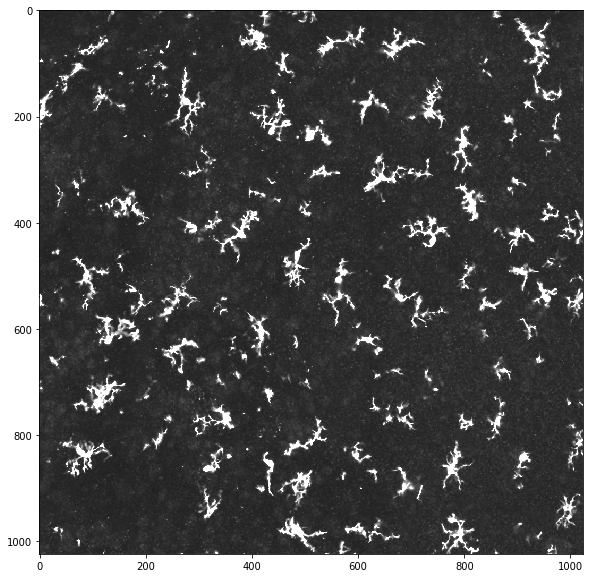

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(test, cmap='gray', vmin=0, vmax=120)
sio.imsave('test.png', test)

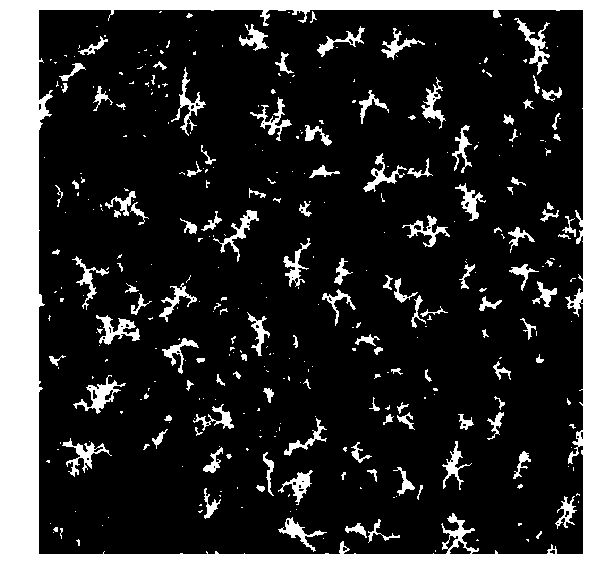

In [12]:
binary0 = imp.binary_image('test.png', threshold=50, close=True, show=True)

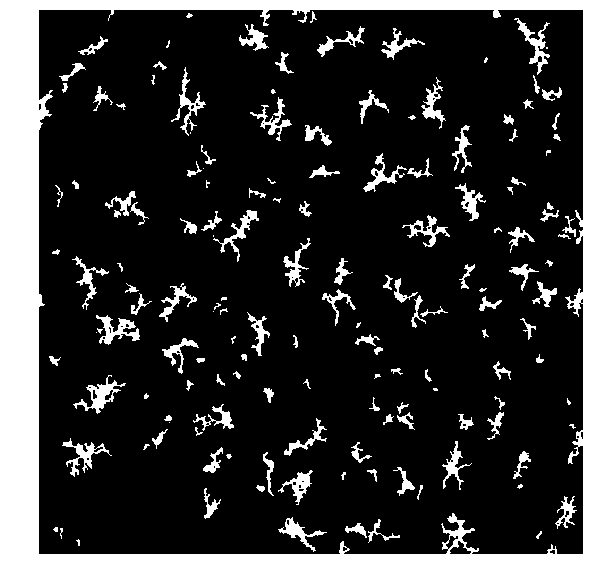

In [13]:
short_image, props = imp.label_image('clean_test.png', show=True)

binary0 = sio.imread('short_clean_test.png')
binary0 = binary0 > 1

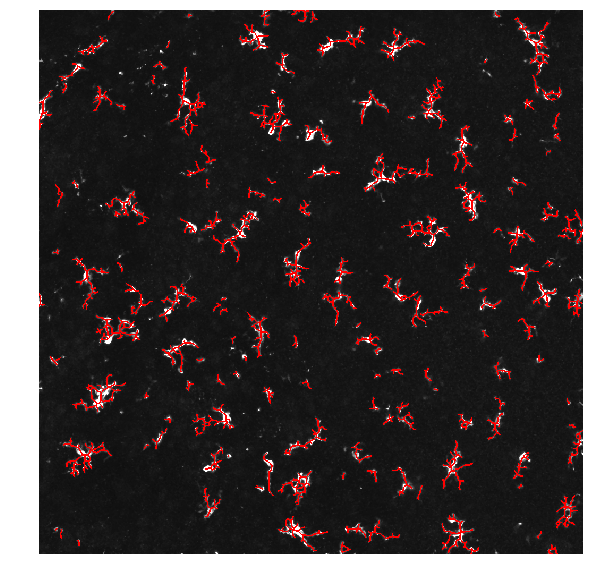

In [14]:
from skimage import morphology
from skan import draw

skeleton0 = morphology.skeletonize(binary0)
fig, ax = plt.subplots(figsize=(10, 10))
draw.overlay_skeleton_2d(test, skeleton0, dilate=1, axes=ax)

In [15]:
from skan import csr

branch_data = csr.summarise(skeleton0)
branch_data.head()

,branch-distance,branch-type,coord-0-0,coord-0-1,coord-1-0,coord-1-1,euclidean-distance,img-coord-0-0,img-coord-0-1,img-coord-1-0,img-coord-1-1,node-id-0,node-id-1,skeleton-id
0,16.406854,1,0.00,432.0,9.750000,423.000000,13.268855,0,432,9,423,3,34,1
1,3.299832,1,0.00,480.0,2.333333,482.333333,3.299832,0,480,2,482,4,9,2
2,7.564153,2,0.25,489.0,2.333333,482.333333,6.984606,0,489,2,482,8,9,2
3,12.788273,2,0.25,489.0,2.250000,501.000000,12.165525,0,489,2,501,8,10,2
4,6.358495,1,2.25,501.0,1.000000,507.000000,6.128825,2,501,1,507,10,29,2


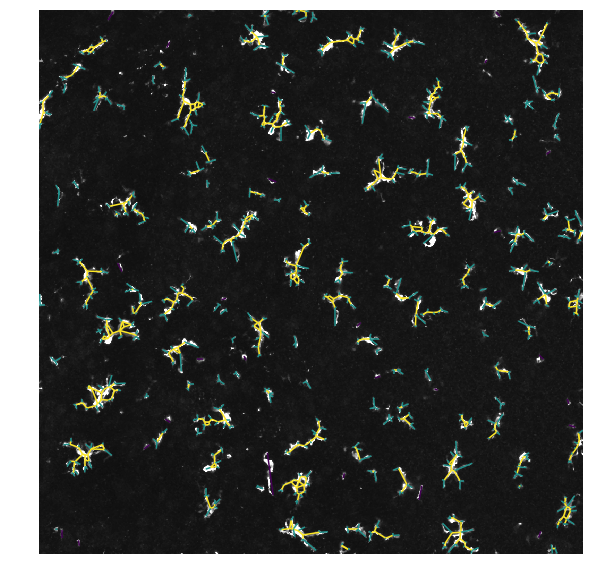

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
draw.overlay_euclidean_skeleton_2d(test, branch_data_short, skeleton_color_source='branch-type', axes=ax)

In [17]:
branch_data_short = branch_data

In [18]:
mglia = branch_data['skeleton-id'].max()
nbranches = []
branch_data_short = branch_data

ncount = 0
for i in range(1, mglia+1):
    bcount = branch_data[branch_data['skeleton-id']==i]['skeleton-id'].count()
    if bcount > 0:
        ids = branch_data.index[branch_data['skeleton-id']==i].tolist()
        nbranches.append(bcount)
        for j in range(0, len(ids)):
            branch_data_short.drop([ids[j]])
        
        ncount = ncount + 1
    

In [ ]:
np.mean(np.asarray(nbranches))

In [ ]:
mglia = branch_data['skeleton-id'].max()
nbranches = []

ncount = 0
for i in range(1, mglia+1):
    bcount = branch_data[branch_data['skeleton-id']==i]['skeleton-id'].count()
    nbranches.append(bcount)


In [ ]:
nbranches

In [20]:
skeleton0, branch_data_short, nbranches = imp.skeleton_image(files[0], show=True)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


FileNotFoundError: [Errno 2] No such file or directory: 'filt_data/mglia_small.png'